<a href="https://colab.research.google.com/github/davetew/Modern-Aerospace-Propulsion/blob/main/Week%205%20-%20Combustors%20%26%20Augmentors/Gibbs_Energy_Minimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Gibbs Free Energy Minimization for Equilibrium Combustion Modeling

This tutorial outlines the theoretical basis and practical approach for modeling chemical equilibrium in combustion processes, such as those in a gas turbine combustor, using the Gibbs Free Energy minimization method. This method is powerful because it determines the equilibrium composition of products at a given temperature and pressure without requiring knowledge of the specific chemical reaction pathways.

---

## 1. Introduction to Chemical Equilibrium in Combustion

In a gas turbine combustor, fuel and air are mixed and burned at high pressure. The goal of a combustion model is often to predict the composition of the exhaust gases and the final temperature. When the reaction time is long enough compared to chemical kinetic timescales, the system can be assumed to reach a state of **chemical equilibrium**.

At equilibrium, the forward and reverse rates of all chemical reactions are equal, and the net rate of change for all species concentrations is zero. The second law of thermodynamics provides a powerful criterion for this state: a system at constant temperature ($T$) and pressure ($P$) will reach equilibrium when its **Gibbs Free Energy ($G$) is at a minimum**.

Our goal is to find the set of mole numbers $\{n_1, n_2, \dots, n_k\}$ for all possible product species that minimizes the total Gibbs Free Energy of the system, subject to the constraint that atoms are conserved.

---

## 2. Thermodynamic Formulation

### The Gibbs Free Energy of a Mixture

For a mixture of $k$ ideal gas species, the total Gibbs Free Energy ($G$) is the sum of the partial molar Gibbs Free Energies of each species:

$$
G = \sum_{i=1}^{k} n_i \bar{g}_i
$$

where:
- $n_i$ is the number of moles of species $i$.
- $\bar{g}_i$ is the partial molar Gibbs Free Energy (or chemical potential) of species $i$ in the mixture.

For an ideal gas, $\bar{g}_i$ is given by:

$$
\bar{g}_i(T, P) = \bar{g}_i^o(T) + RT \ln\left(\frac{p_i}{P^o}\right)
$$

where:
- $\bar{g}_i^o(T)$ is the standard-state Gibbs Free Energy of species $i$ at temperature $T$ and standard pressure $P^o$ (typically 1 bar).
- $R$ is the universal gas constant (8.314 J/mol-K).
- $p_i$ is the partial pressure of species $i$.
- $P^o$ is the standard-state pressure.

The partial pressure $p_i$ can be expressed using the mole fraction $y_i$ and the total pressure $P$:

$$
p_i = y_i P = \left(\frac{n_i}{N_{total}}\right)P
$$

where $N_{total} = \sum_{i=1}^{k} n_i$.

Substituting this back into the expression for $G$, we get the objective function we want to minimize:

$$
G(n_1, \dots, n_k) = \sum_{i=1}^{k} n_i \left[ \bar{g}_i^o(T) + RT \ln\left(\frac{n_i}{N_{total}}\frac{P}{P^o}\right) \right]
$$

---

## 3. The Constrained Minimization Problem

We do not minimize $G$ unconstrained. The minimization must obey the law of mass conservation for each element present in the system.

### The Atom Balance Constraint

Let's say there are $m$ unique elements in our system (e.g., C, H, O, N). The total number of moles of each element must be the same before and after the reaction.

First, we calculate the total moles of each element $j$ in the reactants, which we will call $b_j$. For example, for the combustion of 1 mole of methane (CH₄) with 2 moles of oxygen (O₂), the reactant elemental moles are:
- $b_C = 1$ mol
- $b_H = 4$ mol
- $b_O = 4$ mol

The constraint equation for each element $j$ is then formulated by summing the number of atoms of that element across all possible product species:

$$
\sum_{i=1}^{k} n_i a_{ij} = b_j \quad \text{for each element } j=1, \dots, m
$$

where:
- $a_{ij}$ is the number of atoms of element $j$ in one molecule of product species $i$.

Additionally, the number of moles of any species cannot be negative:

$$
n_i \ge 0 \quad \text{for each species } i=1, \dots, k
$$

The problem is now fully defined: **Minimize $G(n_1, \dots, n_k)$ subject to the $m$ atom balance constraints.**

---

## 4. Method of Solution: Lagrange Multipliers

This constrained optimization problem is perfectly suited for the **method of Lagrange Multipliers**. We define a new function, the Lagrangian $\mathcal{L}$, which combines the objective function and the constraints:

$$
\mathcal{L} = G - \sum_{j=1}^{m} \lambda_j \left( \sum_{i=1}^{k} n_i a_{ij} - b_j \right)
$$

where $\lambda_j$ are the Lagrange multipliers, one for each element constraint.

To find the minimum, we take the partial derivative of $\mathcal{L}$ with respect to each mole number $n_i$ and set it to zero.

$$
\frac{\partial \mathcal{L}}{\partial n_i} = \frac{\partial G}{\partial n_i} - \sum_{j=1}^{m} \lambda_j a_{ij} = 0
$$

The derivative of the total Gibbs Free Energy $G$ with respect to $n_i$ is simply the chemical potential $\bar{g}_i$. Therefore, for each species $i$, we get one equation:

$$
\bar{g}_i - \sum_{j=1}^{m} \lambda_j a_{ij} = 0
$$

Substituting the expression for $\bar{g}_i$:

$$
\left[ \bar{g}_i^o(T) + RT \ln\left(\frac{n_i}{N_{total}}\frac{P}{P^o}\right) \right] - \sum_{j=1}^{m} \lambda_j a_{ij} = 0
$$

This gives us a system of **$k$ non-linear equations** (one for each species). Together with the **$m$ linear atom balance constraint equations**, we have a complete system of $k+m$ equations for the $k$ unknown mole numbers ($n_i$) and the $m$ unknown Lagrange multipliers ($\lambda_j$). This system must be solved numerically.

---

## 5. Computational Algorithm

Solving this system requires a numerical approach. Below is a general algorithm.

1.  **Define the System:**
    * **Reactants:** Specify the fuel and oxidizer and their initial mole numbers.
    * **Conditions:** Define the final equilibrium temperature $T$ and pressure $P$ for which you want to find the composition. (Note: To find the adiabatic flame temperature, this calculation must be coupled with an energy balance and solved iteratively).
    * **Products:** Identify a comprehensive list of all possible product species. For hydrocarbon combustion, this list should include major species (CO₂, H₂O, N₂) and minor species (CO, H₂, O₂, H, O, OH, NO, NO₂, etc.). Omitting a potentially significant species will lead to an incorrect result.

2.  **Calculate Atom Balances:** From the specified reactants, calculate the total moles of each element, $b_j$.

3.  **Obtain Thermodynamic Data:** For each potential product species, obtain the value of its standard-state Gibbs Free Energy of formation, $\bar{g}_i^o(T)$, at the specified temperature $T$. This data is typically sourced from established databases like the JANAF tables or represented by polynomial functions, such as the NASA Glenn Coefficients.

4.  **Solve the Non-Linear System:**
    * Make an initial guess for the mole numbers $n_i$.
    * Use an iterative numerical solver, like the Newton-Raphson method, to solve the $k+m$ equations for the unknowns ($n_i$ and $\lambda_j$).
    * This is the core of computational equilibrium codes.

5.  **Analyze Results:** The converged values of $n_i$ represent the equilibrium mole numbers of each product species in the mixture. From these, you can calculate mole fractions, mass fractions, and other thermodynamic properties of the exhaust gas.

---

## 6. References and Further Reading

This topic is a cornerstone of combustion theory and chemical thermodynamics. For deeper study, the following resources are highly recommended:

1.  **Textbooks:**
    * Turns, S. R. (2011). *An Introduction to Combustion: Concepts and Applications*. McGraw-Hill Education. [Link to Publisher](https://www.mheducation.com/highered/product/introduction-combustion-concepts-applications-turns/9780073380193.html)
    * Çengel, Y. A., & Boles, M. A. (2019). *Thermodynamics: An Engineering Approach*. McGraw-Hill Education. [Link to Publisher](https://www.mheducation.com/highered/product/thermodynamics-engineering-approach-cengel-boles/9781260092684.html)

2.  **Software Tools:**
    * **NASA CEA (Chemical Equilibrium with Applications):** A program developed by NASA that calculates chemical equilibrium compositions and properties for complex mixtures. [NASA CEA Website](https://www.grc.nasa.gov/www/CEAWeb/)
    * **Cantera:** An open-source suite of tools for problems involving chemical kinetics, thermodynamics, and transport processes. It has robust equilibrium solvers based on the principles described here. [Cantera Website](https://cantera.org/)

In [ ]:
# Quietly install cantera (Combustion) and pint (Units) -- both non-standard Colab packages
%pip install -q cantera pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 44.9 MB/s eta 0:00:00


In [ ]:
# Import the required python packages
import numpy as np
import cantera as ct
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina' # Mac retina display resolution for plots

from typing import Dict, Literal, Tuple, Union, List

import pandas as pd
import pint

# Save default unit registry in ureg & Quantity in Q_
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity

# Define a currency dimension with usd (US dollar) as the base unit
ureg.define('usd = [currency]')

# Define a passenger dimension with passengers as the base unit
ureg.define('passenger = [passenger]')

# for convenience:
def to_si(quant):
    '''Converts a Pint Quantity to magnitude at base SI units.
    '''
    return quant.to_base_units().magnitude

In [ ]:
# Extract all species in the NASA database
full_species = ct.Species.list_from_file('nasa_gas.yaml')

# Select all species with C, O, N, or H atoms
selected_species = []
for species in full_species:
    elements = species.composition.keys()
    if all(elem in ['C', 'O', 'N', 'H'] for elem in elements):
        selected_species.append(species)

# Define a solution with all the selected species
gas = ct.Solution(thermo='ideal-gas', species=selected_species, name="Test")


In [ ]:
class Combustion:
  """Class to facilitate the equilibrium analysis of combustion reactions with Cantera"""

  # Extract all species in the NASA database
  full_species = ct.Species.list_from_file('nasa_gas.yaml')

  # Select all species with C, O, N, or H atoms
  species = []
  for spec in full_species:
      elements = spec.composition.keys()
      if all(elem in ['C', 'O', 'N', 'H'] for elem in elements):
          species.append(spec)

  def __init__(self, fuel: Dict[str, float] = {'Jet-A(g)': 1.0},
               oxidizer: Dict[str, float] = {'O2': 1.0, 'N2': 3.76},
               composition_basis: Literal['mass', 'mole'] = 'mole',
               phi: float = 1.0, mechanism: Union[str, None] = None) -> None:
    """Initialize an instance of Combustion given
    fuel (Dict): The fuel composition,
    oxidizer (Dict): The oxidizer composition,
    composition_basis (Literal['mass' or 'mole']: The basis by which the fuel and oxidizer compositions are specified,
    phi (float): The ratio of the fuel to air mass ratio to the stoichiometric fuel to air mass ratio,
    mechanims Union[str, None]: The cantera mechanism to use for properties with the default being the NASA CEA gas properties"""

    # Save the input parameters
    self.fuel = fuel
    self.oxidizer = oxidizer
    self.composition_basis = composition_basis
    self.phi = phi
    self.mechanism = mechanism

    # Initialize an instance of a Cantera solution
    if mechanism is None:
      # Use the default NASA CEA gaseous species properties
      self.phase = ct.Solution(thermo='ideal-gas', species=selected_species)
    else:
      # Use the specified me
      self.phase = ct.Solution(mechanism)

  def Solution(self, name="Generic Solution"):
    """Return a Cantera solution using either the default NASA CEA properties or the specified mechanism"""
    if self.mechanism is None:
      # Use the default NASA CEA gaseous species properties
      return ct.Solution(thermo='ideal-gas', species=selected_species, name=name)
    else:
      return ct.Solution(self.mechanism)

  @property
  def lower_heating_value(self) -> Q_:
    """Calculate and return the lower heating value of the specified fuel"""

    # Specify the reactant state
    reactants = self.Solution(name="Reactants")
    reactants.TP = 298, ct.one_atm
    reactants.set_equivalence_ratio(1.0, self.fuel, self.oxidizer, self.composition_basis)

    # Calculate the fuel mass fraction
    Y_fuel = reactants[self.fuel].Y[0]

    # Complete combustion product mole fractions
    X_products = {'CO2': reactants.elemental_mole_fraction('C'),
                  'H2O': 0.5 * reactants.elemental_mole_fraction('H'),
                  'N2': 0.5 * reactants.elemental_mole_fraction('N')}

    # Calculate the product enthalpy at 298 K, 1 atm
    products = self.Solution(name="Products")
    products.TPX = 298, ct.one_atm, X_products

    return Q_( (reactants.enthalpy_mass - products.enthalpy_mass) / Y_fuel,
              'J/kg').to_compact()

  def flame_temperature(self, phi: Union[None, float]= None, T_K: float = 298, p_bar: float = 1, ) -> Q_:
    """Calculate and return the adiabatic flame temperature of the specified fuel given
    the specified initial temperature and pressure"""

    # Use the default phi if not specified
    phi = self.phi if phi is None else phi
    reactants = self.Solution(name="Reactants")
    reactants.TP = T_K, p_bar * ct.one_atm
    reactants.set_equivalence_ratio(phi, self.fuel, self.oxidizer, self.composition_basis)

    # Equilibrate the mixture @ constant enthalpy and pressure
    reactants.equilibrate('HP')

    return Q_(reactants.T, "K")

  def products(self, phi: Union[None, float]= None, T_K: float = 298, p_bar: float = 1,
               composition_basis: Union[Literal['mass', 'mole'], None] = None) -> pd.Series:
    """Calculate and return the product composition of the specified fuel given
    the specified initial temperature and pressure"""

    # Use the default phi if not specified
    phi = self.phi if phi is None else phi
    reactants = self.Solution(name="Reactants")
    reactants.TP = T_K, p_bar * ct.one_atm
    reactants.set_equivalence_ratio(phi, self.fuel, self.oxidizer, self.composition_basis)

    # Equilibrate the mixture @ constant enthalpy and pressure
    reactants.equilibrate('HP')

    # Return the product mole fractions
    return pd.Series({species: reactants[species].Y[0] for species in reactants.species_names})


In [ ]:
test = Combustion()
print(f'Lower_heating_value = {test.lower_heating_value}')
print(f'Adiabatic flame temperature = {test.flame_temperature()}')

Lower_heating_value = 43.35125208132691 kilojoule / gram
Adiabatic flame temperature = 2279.305902405118 kelvin


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1487243949.py:9: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title(f'Adiabatic flame temperature versus $\phi$: Fuel = {burner.fuel}')
/tmp/ipython-input-1025099099.py:83: UserWarning: ChemEquil::equilibrate: Temperature (298.0029421639376 K) outside valid range of 300 K to 5000 K
  reactants.equilibrate('HP')


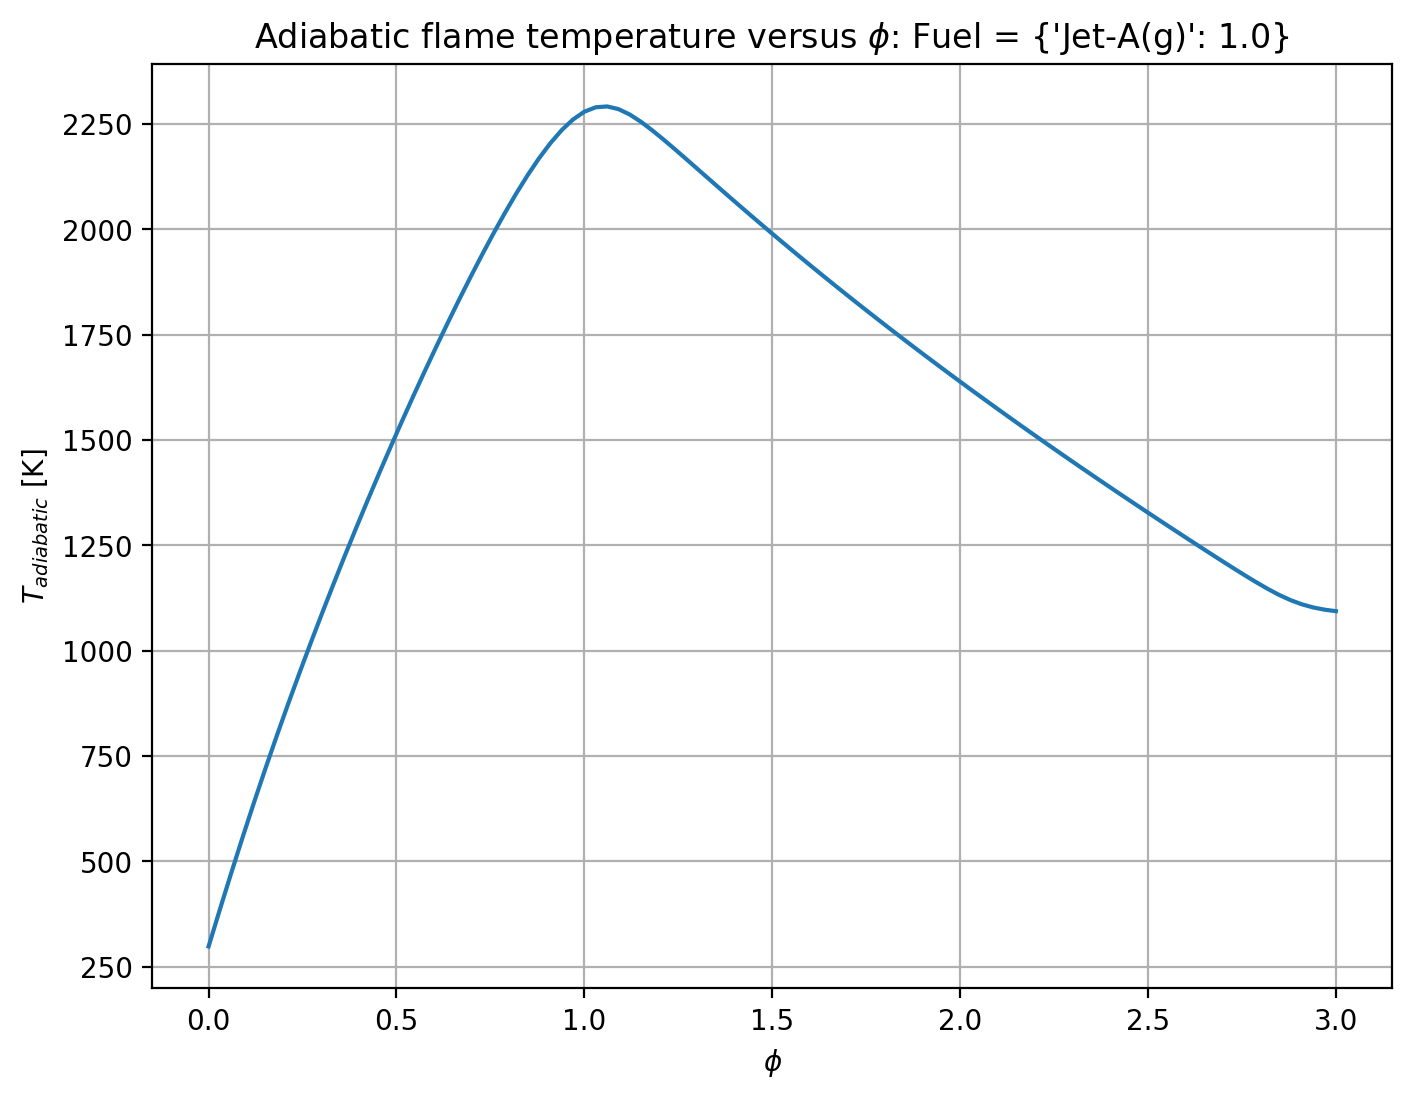

In [ ]:
# Plot the adiabatic flame temperarature versus phi
phi = np.linspace(1e-6, 3, 100)
burner = Combustion()

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(phi, [burner.flame_temperature(phi=p).m_as('K') for p in phi])
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$T_{adiabatic}$ [K]')
ax.set_title(f'Adiabatic flame temperature versus $\phi$: Fuel = {burner.fuel}')
plt.grid()
plt.show()

/tmp/ipython-input-1025099099.py:99: UserWarning: ChemEquil::equilibrate: Temperature (298.0029421639376 K) outside valid range of 300 K to 5000 K
  reactants.equilibrate('HP')


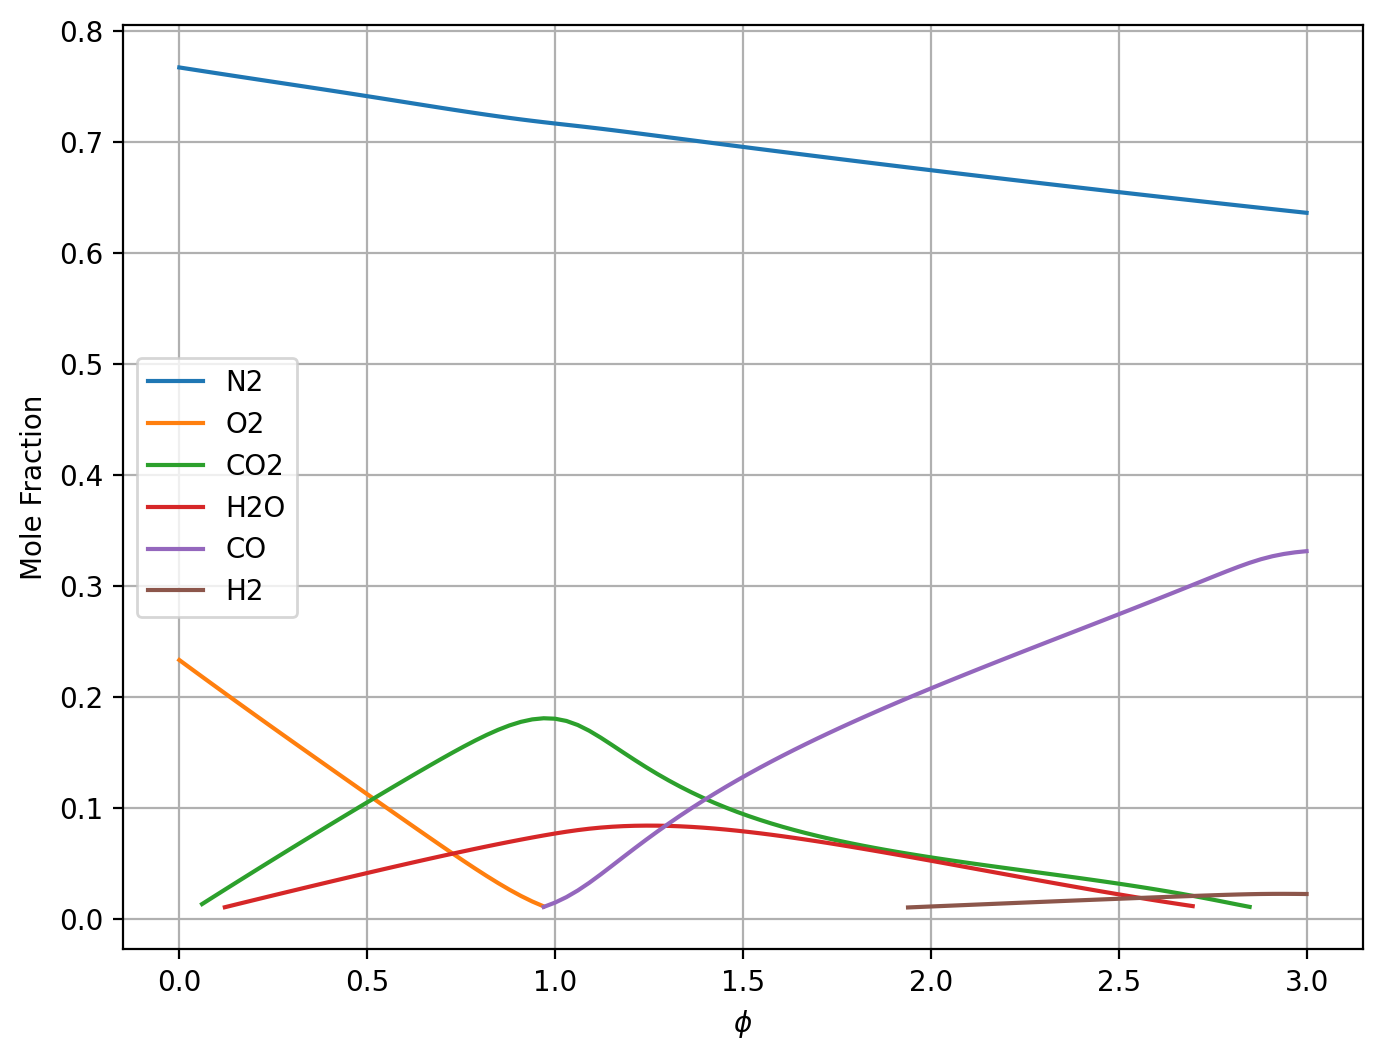

In [ ]:
# Plot the product mole fractions versus phi

mole_fractions = pd.DataFrame(index=phi)
for p in phi:
  products = test.products(phi=p)
  products = products[products > 1e-2]
  for species in products.index:
    mole_fractions.loc[p, species] = products[species]

fig, ax = plt.subplots(1,1, figsize=(8,6))
mole_fractions.plot(ax=ax)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'Mole Fraction')
ax.grid()
plt.show()
